In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__58_Arduino_28_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST experiment_centroid_links_mutated-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.636364,2.333333,0.079167,0.000000,0.375417,0.0875,0.000000,0.000000,25
1,11,1.5,1,20,0.05,0,2.610390,3.666667,0.000000,0.000000,0.329167,0.0125,0.000000,0.000000,14
2,2,1.5,1,10,0.05,0,2.844156,3.333333,0.000000,0.000000,0.243750,0.0875,0.000000,0.000000,14
3,4,1.5,1,10,0.05,0,2.662338,2.666667,0.041667,0.000000,0.397917,0.0250,0.000000,0.000000,20
4,8,1.5,1,10,0.05,0,2.909091,3.333333,0.037500,0.000000,0.374286,0.1375,0.000000,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,324,5.5,5,40,0.15,86,2.866667,2.885714,0.733834,1.531646,0.665625,21.0000,-0.251808,-0.081754,1480
29480,324,5.5,5,40,0.15,87,3.133333,2.771429,0.734091,1.531329,0.665787,20.9875,-0.501808,0.055746,1481
29481,324,5.5,5,40,0.15,88,2.755556,2.914286,0.734091,1.531329,0.665787,20.9875,-0.714308,-0.006754,1481
29482,324,5.5,5,40,0.15,89,2.844444,2.714286,0.734091,1.531329,0.665787,20.9875,-0.676808,-0.269254,1481


In [4]:
df_move=df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.724612        1.498468      0.041049   
                      1         2.762905        2.544962      0.055247   
                      2         2.922839        2.727229      0.065104   
                      3         2.967566        2.609250      0.074147   
                      4         2.933038        2.559349      0.081103   
...                                  ...             ...           ...   
5.5                   86        2.897671        2.586804      0.697399   
                      87        2.951530        2.554488      0.697861   
                      88        2.896412        2.423687      0.698513   
                      89        2.785369        2.456442      0.699299   
                      90        3.048370        2.588462      0.699939   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.279515     0.068171    0.000000   
                      1     0.000000   0.295590     0.193981    0.072456   
                      2     0.000000   0.334471     0.329630    0.059289   
                      3     0.000000   0.349604     0.645486    0.051888   
                      4     0.000000   0.363981     1.001273    0.055935   
...                              ...        ...          ...         ...   
5.5                   86    1.632006   0.524528    39.985185   -0.167516   
                      87    1.628733   0.525590    39.833449   -0.185803   
                      88    1.626248   0.526374    39.723611   -0.196914   
                      89    1.623488   0.527290    39.600579   -0.204437   
                      90    1.647902   0.528190    39.501273   -0.214044   

                            centroid-y       links  
radius-of-interaction step                          
1.5                   0       0.000000   15.611111  
                      1       0.080096   19.574074  
                      2       0.074513   23.231481  
                      3       0.054770   26.620370  
                      4       0.054431   29.833333  
...                                ...         ...  
5.5                   86     -0.167026  837.009259  
                      87     -0.135892  841.148148  
                      88     -0.133809  844.916667  
                      89     -0.136702  848.879630  
                      90     -0.122466  852.518519  

[273 rows x 9 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.724612        1.498468      0.041049   
                      1         2.762905        2.544962      0.055247   
                      2         2.922839        2.727229      0.065104   
                      3         2.967566        2.609250      0.074147   
                      4         2.933038        2.559349      0.081103   
...                                  ...             ...           ...   
5.5                   86        2.897671        2.586804      0.697399   
                      87        2.951530        2.554488      0.697861   
                      88        2.896412        2.423687      0.698513   
                      89        2.785369        2.456442      0.699299   
                      90        3.048370        2.588462      0.699939   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.279515     0.068171    0.000000   
                      1     0.000000   0.295590     0.193981    0.072456   
                      2     0.000000   0.334471     0.329630    0.059289   
                      3     0.000000   0.349604     0.645486    0.051888   
                      4     0.000000   0.363981     1.001273    0.055935   
...                              ...        ...          ...         ...   
5.5                   86    1.632006   0.524528    39.985185   -0.167516   
                      87    1.628733   0.525590    39.833449   -0.185803   
                      88    1.626248   0.526374    39.723611   -0.196914   
                      89    1.623488   0.527290    39.600579   -0.204437   
                      90    1.647902   0.528190    39.501273   -0.214044   

                            centroid-y       links  total_mood  
radius-of-interaction step                                      
1.5                   0       0.000000   15.611111    4.223080  
                      1       0.080096   19.574074    5.307867  
                      2       0.074513   23.231481    5.650069  
                      3       0.054770   26.620370    5.576816  
                      4       0.054431   29.833333    5.492388  
...                                ...         ...         ...  
5.5                   86     -0.167026  837.009259    5.484475  
                      87     -0.135892  841.148148    5.506018  
                      88     -0.133809  844.916667    5.320099  
                      89     -0.136702  848.879630    5.241812  
                      90     -0.122466  852.518519    5.636832  

[273 rows x 10 columns]

In [7]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5]['links']

0      15.611111
1      19.574074
2      23.231481
3      26.620370
4      29.833333
         ...    
86    181.953704
87    183.824074
88    185.814815
89    187.574074
90    189.481481
Name: links, Length: 91, dtype: float64

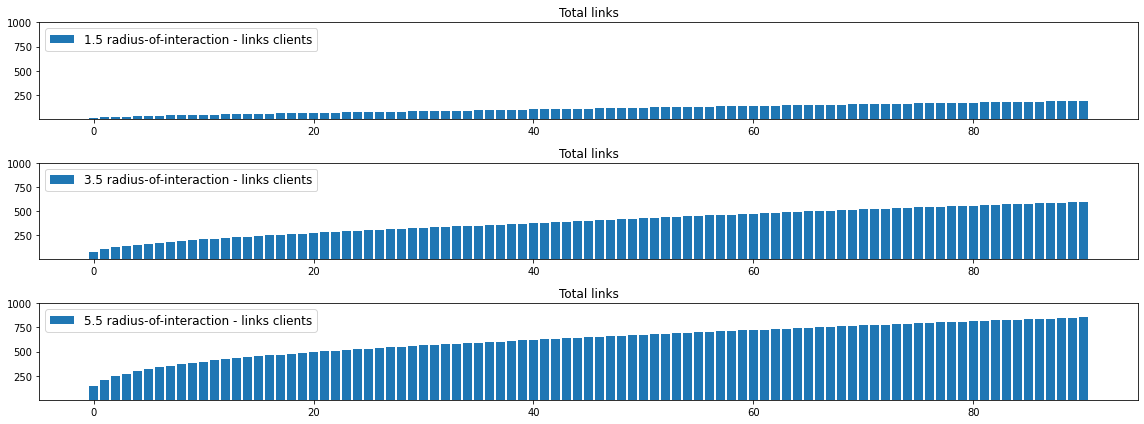

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['links'], label='{} radius-of-interaction - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

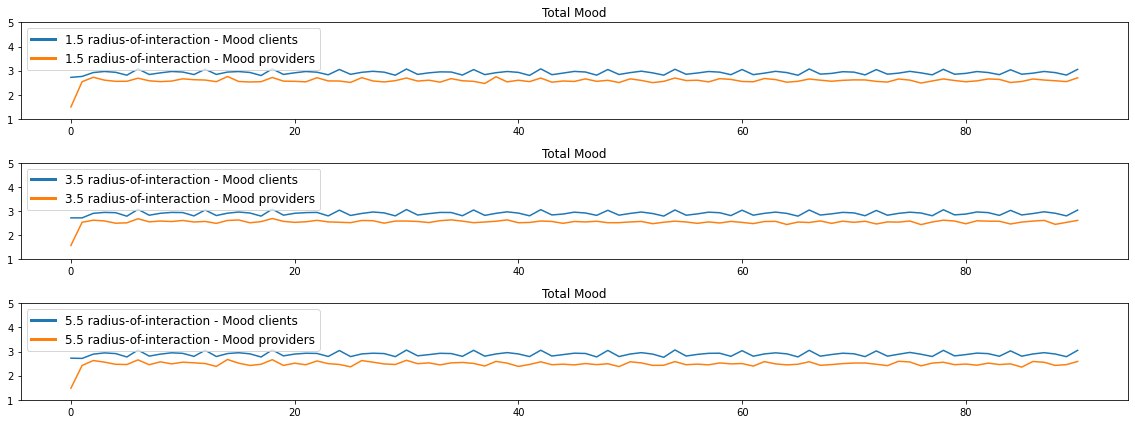

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_clients'], label='{} radius-of-interaction - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_providers'], label='{} radius-of-interaction - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



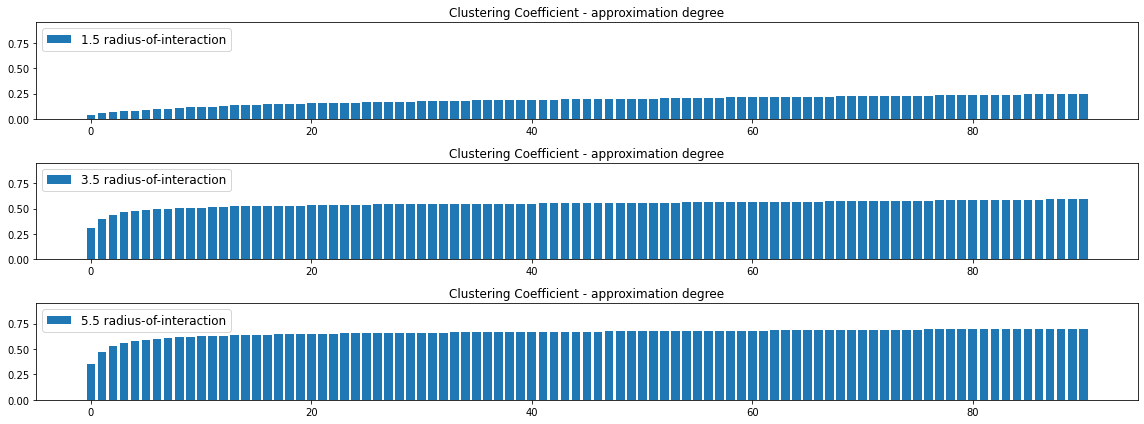

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['cluster_coef'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.95)
plt.show()



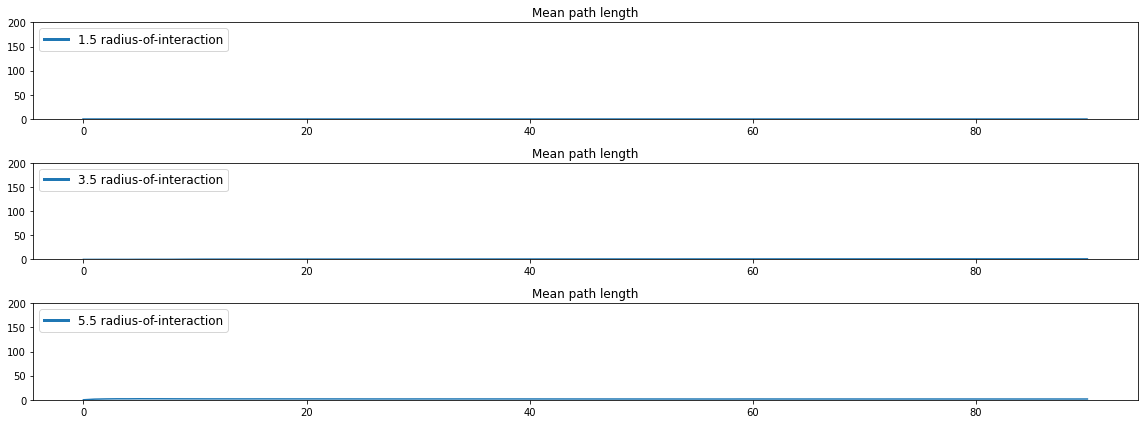

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['paths'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



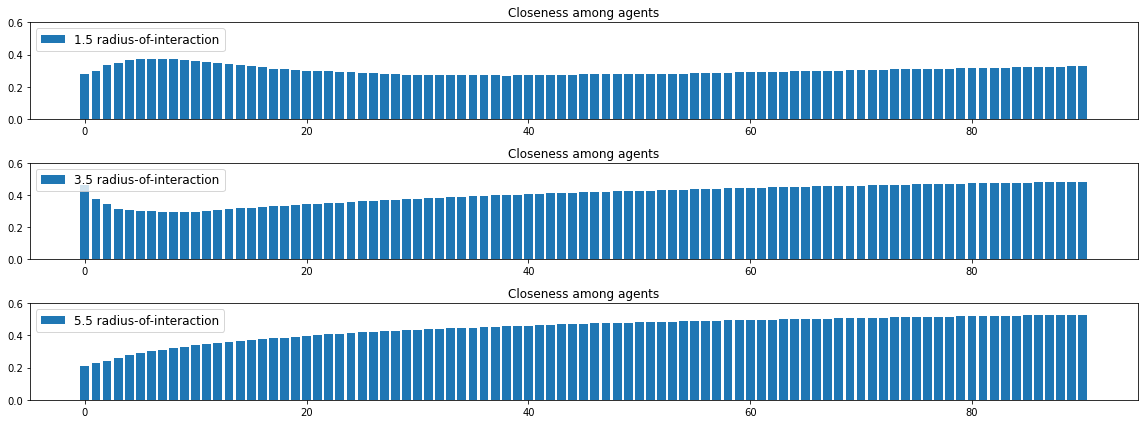

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['closeness'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



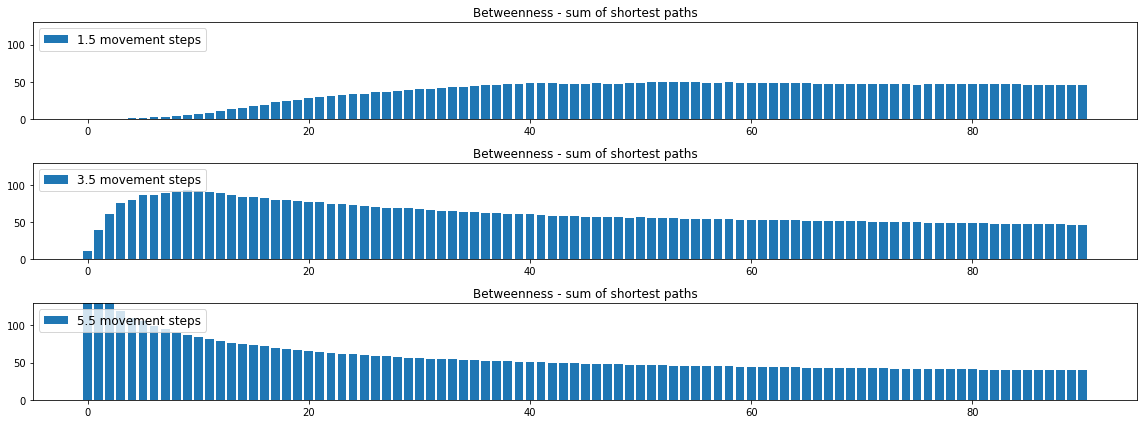

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,130)
plt.show()


In [14]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5].mean()

In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,1.9957,0.0475
1,mood_providers,5.0889,0.0
2,cluster_coef,-65.2813,0.0
3,paths,-72.5274,0.0
4,closeness,-16.4198,0.0
5,betweenness,-6.8703,0.0
6,centroid-x,31.5735,0.0
7,centroid-y,7.1486,0.0
8,links,-27.8367,0.0
9,total_mood,4.5318,0.0


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,3.9829,0.0475
1,mood_providers,25.8973,0.0
2,cluster_coef,4261.6504,0.0
3,paths,5260.2273,0.0
4,closeness,269.6099,0.0
5,betweenness,47.2005,0.0
6,centroid-x,996.8868,0.0
7,centroid-y,51.1028,0.0
8,links,774.8829,0.0
9,total_mood,20.5375,0.0


In [19]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.2830
mood_providers    0.1303
cluster_coef      0.9621
paths                NaN
closeness        -0.8404
betweenness      -0.8450
total_mood        0.9975
centroid-x       -0.0191
centroid-y        0.3789
dtype: float64

In [20]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']

df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.2243
mood_providers    0.1066
cluster_coef      0.7196
paths            -0.3815
closeness         0.9746
betweenness       0.9225
total_mood        0.9673
centroid-x       -0.4737
centroid-y        0.5557
dtype: float64

In [21]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:].shape

(30, 10)

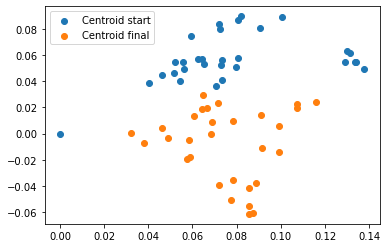

In [22]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

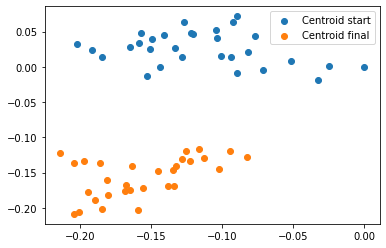

In [23]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [24]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.7246          1.4985        0.0410   
                      1           2.7629          2.5450        0.0552   
                      2           2.9228          2.7272        0.0651   
                      3           2.9676          2.6093        0.0741   
                      4           2.9330          2.5593        0.0811   
...                                  ...             ...           ...   
5.5                   86          2.8977          2.5868        0.6974   
                      87          2.9515          2.5545        0.6979   
                      88          2.8964          2.4237        0.6985   
                      89          2.7854          2.4564        0.6993   
                      90          3.0484          2.5885        0.6999   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2795       0.0682      0.0000   
                      1     0.0000     0.2956       0.1940      0.0725   
                      2     0.0000     0.3345       0.3296      0.0593   
                      3     0.0000     0.3496       0.6455      0.0519   
                      4     0.0000     0.3640       1.0013      0.0559   
...                            ...        ...          ...         ...   
5.5                   86    1.6320     0.5245      39.9852     -0.1675   
                      87    1.6287     0.5256      39.8334     -0.1858   
                      88    1.6262     0.5264      39.7236     -0.1969   
                      89    1.6235     0.5273      39.6006     -0.2044   
                      90    1.6479     0.5282      39.5013     -0.2140   

                            centroid-y     links  total_mood  
radius-of-interaction step                                    
1.5                   0         0.0000   15.6111      4.2231  
                      1         0.0801   19.5741      5.3079  
                      2         0.0745   23.2315      5.6501  
                      3         0.0548   26.6204      5.5768  
                      4         0.0544   29.8333      5.4924  
...                                ...       ...         ...  
5.5                   86       -0.1670  837.0093      5.4845  
                      87       -0.1359  841.1481      5.5060  
                      88       -0.1338  844.9167      5.3201  
                      89       -0.1367  848.8796      5.2418  
                      90       -0.1225  852.5185      5.6368  

[273 rows x 10 columns]

In [25]:
lag=7

/tmp/ipykernel_301158/1379381515.py:46: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


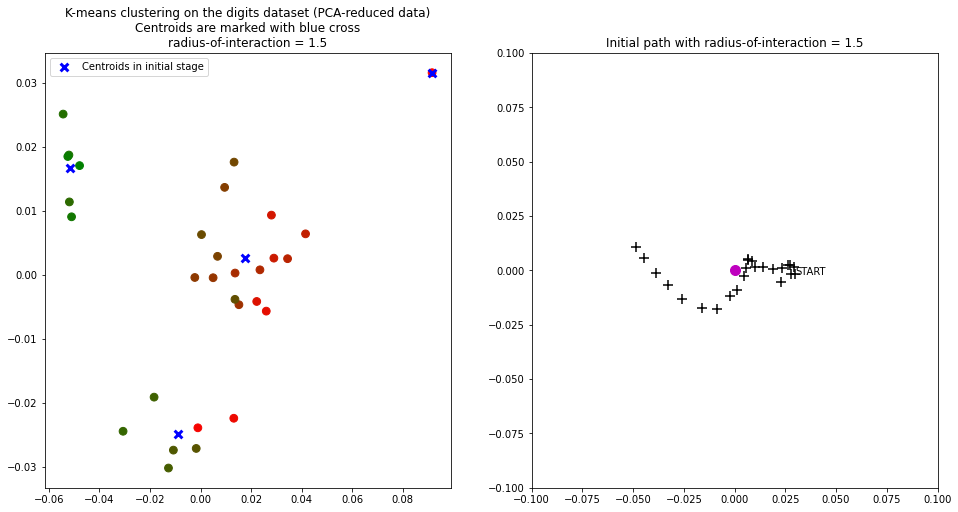

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)


c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)



centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [27]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].shape

(0, 12)

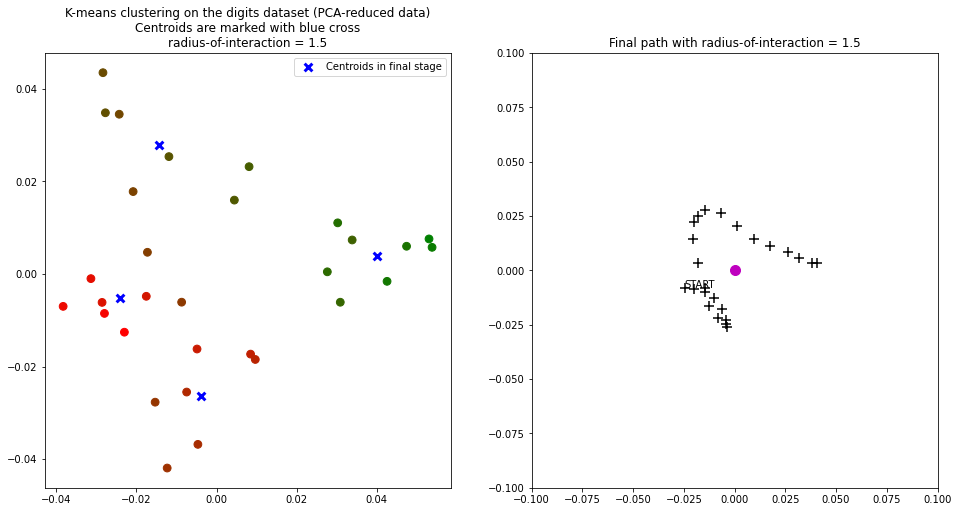

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',s=90)
plt.title("Final path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [29]:
reduced_data[0, 0]

-0.023015901077549767

/tmp/ipykernel_301158/2535280355.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


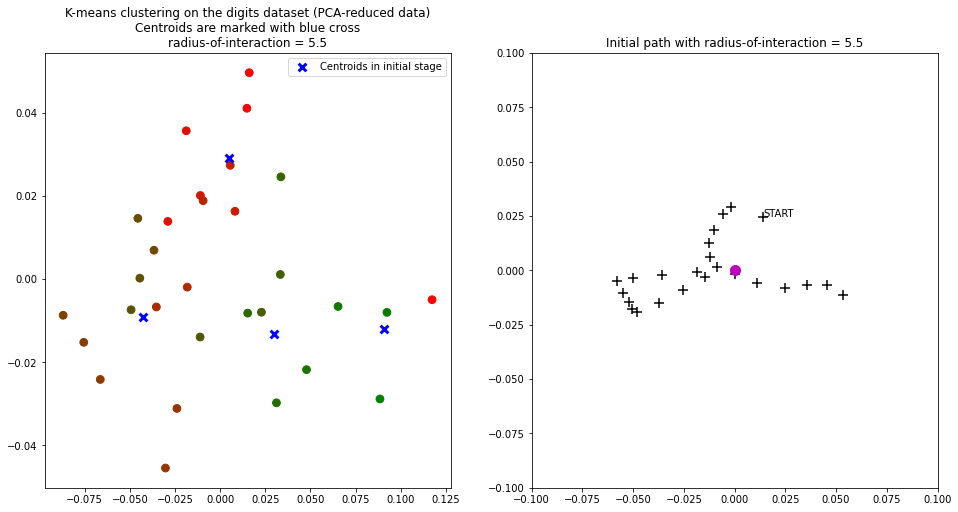

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_301158/2369690354.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


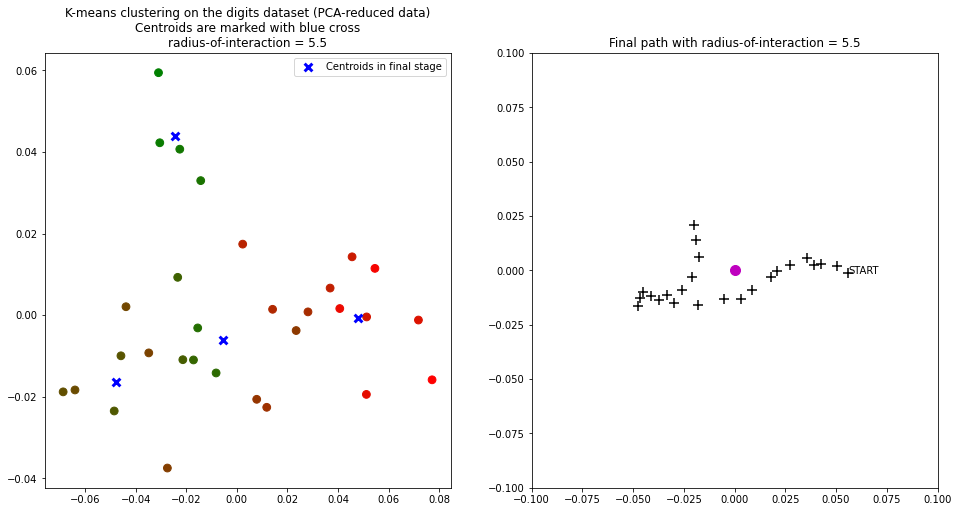

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Final path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()